# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

import string

from google.colab import drive
drive.mount('/content/drive')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2022-12-17 12:48:33.567882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'nltk'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tweets.csv", index_col='tweet_id')

In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Pre-processing(overall)

In [ ]:
# Class wise distribution ---- Highly skewed.
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Column wise null value counts
df.isna().sum()

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
# entries containing both hashtags and mentions
# df.loc[570239632807370753,'text']

In [ ]:
# texts = df['text']
# without_mention = texts.str.replace(r'(@\w+)',"")
# without_mention

In [ ]:
# removed mentions and hashtags
# df['text'] = df['text'].str.replace(r'(@\w+)',"")
# df['text'] = df['text'].str.replace(r'(#\w+)',"")
df = df.iloc[:, [9,0]]

In [ ]:
# df[df['airline_sentiment']=='neutral']
df

,text,airline_sentiment
tweet_id,,
570306133677760513,@VirginAmerica What @dhepburn said.,neutral
570301130888122368,@VirginAmerica plus you've added commercials t...,positive
570301083672813571,@VirginAmerica I didn't today... Must mean I n...,neutral
570301031407624196,@VirginAmerica it's really aggressive to blast...,negative
570300817074462722,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
569587686496825344,@AmericanAir thank you we got on a different f...,positive
569587371693355008,@AmericanAir leaving over 20 minutes Late Flig...,negative
569587242672398336,@AmericanAir Please bring American Airlines to...,neutral


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X = df['text']
Y = df['airline_sentiment']

NameError: name 'df' is not defined

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state= 453,stratify = Y)

In [ ]:
print("X_train shape: ",x_train.shape)
print("Y_train shape: ",y_train.shape)
print(y_train.value_counts())

X_train shape:  (11712,)
Y_train shape:  (11712,)
negative    7343
neutral     2479
positive    1890
Name: airline_sentiment, dtype: int64


In [ ]:
print("X_test shape: ",x_test.shape)
print("Y_test shape: ",y_test.shape)
print(y_test.value_counts())

X_test shape:  (2928,)
Y_test shape:  (2928,)
negative    1835
neutral      620
positive     473
Name: airline_sentiment, dtype: int64


In [ ]:
# df_train = df[: int(0.8*df.shape[0])]
# df_test = df[int(0.8*df.shape[0]):]
# df_train.shape

In [ ]:
type(x_train)

pandas.core.series.Series

#Text cleaning and character embedding

In [ ]:
import re

In [ ]:
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove puncuation
    # translator = str.maketrans('', '', string.punctuation)
    # text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # # Remove numbers
    # text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [ ]:
x_train = x_train.apply(lambda x: clean_string(x))
x_test = x_test.apply(lambda x: clean_string(x))

In [ ]:
x_train

tweet_id
570106717490393088                @united okay ase24766m. find luggage.
569621367806664705    @americanair flight miami dallas monday resche...
569604328153083904    @americanair anything get #aa953 moving? almos...
568715107892641792    @united thank wonderful global first class fli...
569761641211895808    @americanair connecting flight dfw cancelled f...
                                            ...                        
568194427904069632    @usairways appreciate actually monitor twitter...
569698788216049664    @united trying solve problem making. charging ...
568703064691113984    @jetblue much trip warm island @samchampion ht...
568083224146149376    @usairways i've trying days! get hung get prom...
568458701046050816                     @united need follow order dm....
Name: text, Length: 11712, dtype: object

##padding with space

In [ ]:
lens = x_train.apply(lambda x : len(x))
np.max(lens)

159

In [ ]:
def pad_string(st:string):
    z = 160 - len(st)
    st = st + (' '*z)
    return st

In [ ]:
x_train = x_train.apply(lambda x: pad_string(x))
x_test = x_test.apply(lambda x: pad_string(x))

##embedding

In [ ]:
def string_vectorizer(strng, alphabet=string.ascii_lowercase + string.digits + string.punctuation):
    vector = [[0 if char != letter else 1 for char in alphabet] 
                  for letter in strng]
    return vector

In [ ]:
embedded_train = []
for t in x_train:
    v = string_vectorizer(t)
    embedded_train.append(v)
embedded_train = np.array(embedded_train)

In [ ]:
embedded_train.shape

(11712, 160, 68)

In [ ]:
embedded_test = []
for t in x_test:
    v = string_vectorizer(t)
    embedded_test.append(v)
embedded_test = np.array(embedded_test)

In [ ]:
embedded_test.shape

(2928, 160, 68)

In [ ]:
embedded_train=embedded_train.astype('float64')
embedded_test=embedded_test.astype('float64')

In [ ]:
train_feat = embedded_train
test_feat = embedded_test

#Encode labels

In [ ]:
pd.get_dummies(y_train)

,negative,neutral,positive
tweet_id,,,
570106717490393088,1,0,0
569621367806664705,1,0,0
569604328153083904,1,0,0
568715107892641792,0,0,1
569761641211895808,1,0,0
...,...,...,...
568194427904069632,1,0,0
569698788216049664,1,0,0
568703064691113984,0,1,0


In [ ]:
train_labels = np.array(pd.get_dummies(y_train))
test_labels = y_test

In [ ]:
val_labels = np.array(pd.get_dummies(y_test))

In [ ]:
# train_labels = one_hot_labels[:int(0.8*embedded_text.shape[0])]
# test_labels = df['airline_sentiment'][int(0.8*embedded_text.shape[0]):]

In [ ]:
# test_label = one_hot_labels[int(0.8*embedded_text.shape[0]):]

In [ ]:
val_labels.shape

(2928, 3)

#model

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv1D(32, 3, activation='relu'),
        tf.keras.layers.MaxPool1D(strides=2),
        tf.keras.layers.Conv1D(64, 3, activation='relu'),
        tf.keras.layers.MaxPool1D(strides=2),
        tf.keras.layers.Conv1D(128, 3, activation='relu'),
        tf.keras.layers.MaxPool1D(strides=2),
        # tf.keras.layers.Conv1D(64, 3, activation='relu'),
        # tf.keras.layers.MaxPool1D(strides=2),
        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dropout(0.25),
        # tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ]
)

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics='accuracy')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3)

In [ ]:
history = model.fit(train_feat, train_labels, epochs= 8, batch_size = 256, validation_data=(test_feat, val_labels),callbacks = callback)
# model.fit(train_feat, train_labels, epochs= 15, batch_size = 128, validation_data=(test_feat, val_labels))

Epoch 1/8
46/46 [==============================] - 10s 206ms/step - loss: 0.8780 - accuracy: 0.6247 - val_loss: 0.8693 - val_accuracy: 0.6346
Epoch 2/8
46/46 [==============================] - 10s 219ms/step - loss: 0.8050 - accuracy: 0.6538 - val_loss: 0.7457 - val_accuracy: 0.6773
Epoch 3/8
46/46 [==============================] - 8s 185ms/step - loss: 0.7300 - accuracy: 0.6948 - val_loss: 0.6901 - val_accuracy: 0.7056
Epoch 4/8
46/46 [==============================] - 9s 199ms/step - loss: 0.6694 - accuracy: 0.7203 - val_loss: 0.6609 - val_accuracy: 0.7220
Epoch 5/8
46/46 [==============================] - 9s 185ms/step - loss: 0.6215 - accuracy: 0.7423 - val_loss: 0.6498 - val_accuracy: 0.7302
Epoch 6/8
46/46 [==============================] - 9s 187ms/step - loss: 0.5804 - accuracy: 0.7650 - val_loss: 0.6141 - val_accuracy: 0.7483
Epoch 7/8
46/46 [==============================] - 9s 190ms/step - loss: 0.5298 - accuracy: 0.7837 - val_loss: 0.6040 - val_accuracy: 0.7572
Epoch 8/8
4

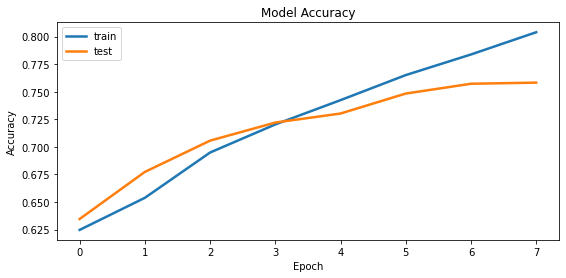

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (9,4))
plt.plot(history.history['accuracy'],linewidth = 2.5)
plt.plot(history.history['val_accuracy'],linewidth = 2.5)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

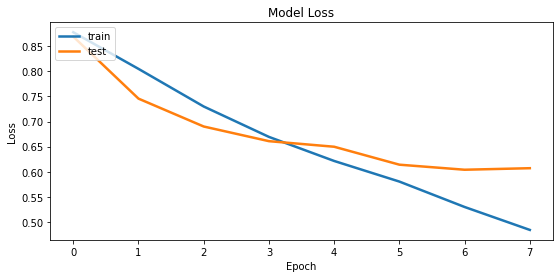

In [ ]:
# summarize history for loss
plt.figure(figsize = (9,4))
plt.plot(history.history['loss'],linewidth = 2.5)
plt.plot(history.history['val_loss'],linewidth = 2.5)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(test_feat)

92/92 [==============================] - 1s 10ms/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 158, 32)           6560      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 79, 32)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 77, 64)            6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 38, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 36, 128)           24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 18, 128)         

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_model_assignment')

In [ ]:
prediction=[]
for p in pred:
    xx = np.argmax(p)
    if xx==2:
        prediction.append('positive')
    elif xx==1:
        prediction.append('neutral')
    else:
        prediction.append('negative')

In [ ]:
print("Accuracy: ", accuracy_score(test_labels, prediction))
print("Precision: ", precision_score(test_labels, prediction, average='macro'))
print("Recall: ", recall_score(test_labels, prediction, average='macro'))
print("F1: ", f1_score(test_labels, prediction, average='macro'))

Accuracy:  0.7581967213114754
Precision:  0.6919961855998684
Recall:  0.6604026223300933
F1:  0.6698304179431122
